# Importing Librries

In [ ]:
## This allowes to import modules from the parent folder
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, '..')

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

In [29]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Dataset
add more files with ' , '

In [30]:
# List of JSON files
json_files = ['/content/drive/MyDrive/BTP/BTP - 20CS10002 - Abhibhu Prakash/Files/FVC2002.json']

In [31]:
# json_files = [
#     '/content/FVC2000.json',
#     '/content/FVC2002.json',
#     ]

# Reading Dataset

In [32]:
df = pd.read_json(json_files[0],orient='records')

In [33]:
points_list = [[dict(x=j[0],y=j[1] ) for j in i ] for i in df[df.path.str.contains("Db1_b/104_")]['mv'] ] 

In [34]:
df[df.path.str.contains("Db1_b/104_")]['path']

168     FVC2002/Dbs/Db1_b/104_1.tif
327     FVC2002/Dbs/Db1_b/104_4.tif
603     FVC2002/Dbs/Db1_b/104_6.tif
1444    FVC2002/Dbs/Db1_b/104_8.tif
1974    FVC2002/Dbs/Db1_b/104_7.tif
2413    FVC2002/Dbs/Db1_b/104_2.tif
2623    FVC2002/Dbs/Db1_b/104_5.tif
3217    FVC2002/Dbs/Db1_b/104_3.tif
Name: path, dtype: object

In [35]:
# import json
# import os
# import pandas as pd

# def read_json_file(file):
#   with open(file, "r") as r:
#         response = r.read()
#         response = response.replace('\n', '')
#         response = response.replace('}{', '},{')
#         response = "[" + response + "]"
#         return json.loads(response)

# points_list = []  # List to store separate fingerprints as dataframes

# for json_file in json_files:
#     try:
#         data = read_json_file(json_file)
#         for entry in data:
#             points_list.append(pd.DataFrame(entry['mv'], columns=['x', 'y', 'flag', 'value']))
#     except json.JSONDecodeError as e:
#         print(f"Error decoding JSON in file {json_file}: {e}")


In [36]:

# Print individual fingerprints
print(points_list[0])
print(points_list[1])

[{'x': 234, 'y': 58}, {'x': 224, 'y': 59}, {'x': 227, 'y': 62}, {'x': 218, 'y': 89}, {'x': 240, 'y': 99}, {'x': 250, 'y': 102}, {'x': 126, 'y': 105}, {'x': 219, 'y': 112}, {'x': 238, 'y': 112}, {'x': 172, 'y': 119}, {'x': 230, 'y': 120}, {'x': 212, 'y': 122}, {'x': 256, 'y': 142}, {'x': 186, 'y': 146}, {'x': 155, 'y': 147}, {'x': 169, 'y': 149}, {'x': 245, 'y': 153}, {'x': 274, 'y': 160}, {'x': 179, 'y': 162}, {'x': 173, 'y': 180}, {'x': 174, 'y': 189}, {'x': 214, 'y': 189}, {'x': 181, 'y': 199}, {'x': 165, 'y': 206}, {'x': 173, 'y': 211}, {'x': 300, 'y': 211}, {'x': 97, 'y': 223}, {'x': 205, 'y': 223}, {'x': 264, 'y': 227}, {'x': 167, 'y': 228}, {'x': 290, 'y': 233}, {'x': 247, 'y': 234}, {'x': 256, 'y': 244}, {'x': 107, 'y': 252}, {'x': 109, 'y': 252}, {'x': 110, 'y': 257}, {'x': 198, 'y': 257}, {'x': 124, 'y': 260}, {'x': 107, 'y': 276}, {'x': 232, 'y': 279}, {'x': 147, 'y': 282}, {'x': 270, 'y': 285}, {'x': 171, 'y': 293}, {'x': 127, 'y': 300}, {'x': 201, 'y': 309}, {'x': 233, 'y':

# Performing Delaunay Triangulation

In [37]:
triangulations = []
for obj in points_list:
    if len(obj) >= 4:
        triangulations.append(Delaunay([(i['x'],i['y']) for i in obj]))
    else:
        triangulations.append(None)

Plotting an Object for testing

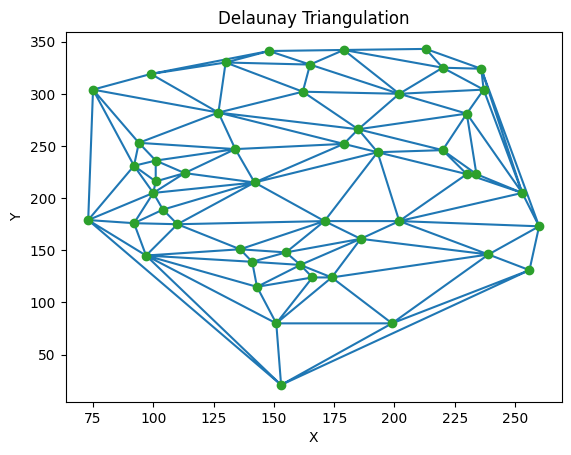

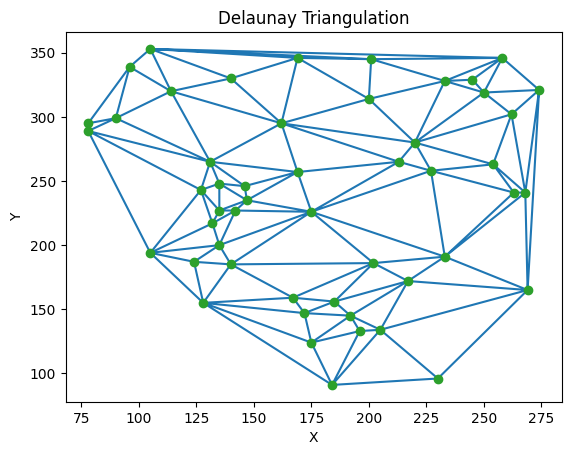

In [38]:
n = 5
triangulation = triangulations[n]
obj = pd.DataFrame(points_list[n])
# Plotting
plt.triplot(obj['x'], obj['y'], triangulation.simplices.copy())
plt.plot(obj['x'], obj['y'], 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Delaunay Triangulation')
plt.show()

# n = 2
# triangulation = triangulations[n]
# obj = pd.DataFrame(points_list[n])
# # Plotting
# plt.triplot(obj['x'], obj['y'], triangulation.simplices.copy())
# plt.plot(obj['x'], obj['y'], 'o')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Delaunay Triangulation')
# plt.show()

n = 7
triangulation = triangulations[n]
obj = pd.DataFrame(points_list[n])
# Plotting
plt.triplot(obj['x'], obj['y'], triangulation.simplices.copy())
plt.plot(obj['x'], obj['y'], 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Delaunay Triangulation')
plt.show()

In [39]:
print(triangulations[0])